In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import OneHotEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
import nltk
from nltk.corpus import stopwords
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor

## Exploração dos dados

In [2]:
df_categoria = pd.read_csv('../data/contratos/categoria_contrato.csv')

In [3]:
df_categoria.head()

,nr_contrato,nm_categoria_profissional,vl_mensal_salario_mean,vl_mensal_salario_median,vl_mensal_custo_mean,vl_mensal_custo_median,nr_jornada_mean,nr_jornada_median,id_terc_count,sg_orgao_sup_tabela_ug_x,...,id_contrato,objeto_contrato,objeto_compra,dataAssinatura,dataPublicacaoDOU,dataInicioVigencia,dataFimVigencia,tipo_fornecedor,valorInicialCompra,valorFinalCompra
0,12012,517330 - VIGILANTE,1775.28,1775.28,3923.92,3923.92,40.0,40.0,46,MINIST.,...,668336396.0,Objeto: Prestação de serviço de vigilancia d...,Objeto: Pregão Eletrônico - Contratação de em...,2012-06-18,2012-07-05,2012-06-18,2013-06-18,Entidades Empresariais Privadas,687542.00,2660693.36
1,12014,513315 - CAMAREIRO DE HOTEL,1549.11,1549.11,4281.87,4281.87,44.0,44.0,4,MP.,...,668318167.0,Objeto: Contratação de empresa especializada n...,Objeto: Pregão Eletrônico - Contratação de em...,2009-01-12,2009-01-13,2009-01-12,2010-01-11,Entidades Empresariais Privadas,913810.56,5687893.20
2,12014,514315 - LIMPADOR DE FACHADAS,1549.11,1549.11,4281.87,4281.87,44.0,44.0,1,MP.,...,668318167.0,Objeto: Contratação de empresa especializada n...,Objeto: Pregão Eletrônico - Contratação de em...,2009-01-12,2009-01-13,2009-01-12,2010-01-11,Entidades Empresariais Privadas,913810.56,5687893.20
3,12014,622015 - TRABALHADOR NA PRODUCAO DE MUDAS E SE...,1549.11,1549.11,4281.87,4281.87,44.0,44.0,1,MP.,...,668318167.0,Objeto: Contratação de empresa especializada n...,Objeto: Pregão Eletrônico - Contratação de em...,2009-01-12,2009-01-13,2009-01-12,2010-01-11,Entidades Empresariais Privadas,913810.56,5687893.20
4,12016,313120 - TECNICO DE MANUTENCAO ELETRICA,4131.04,4131.04,9030.21,9030.21,30.0,30.0,5,MCTI,...,668296909.0,Objeto: Prestação de serviços de Limpeza e Con...,"Objeto: Pregão Eletrônico - Contratação,em re...",2011-01-03,2011-02-11,2011-01-03,2012-01-03,Entidades Empresariais Privadas,764634.12,4775950.54


In [4]:
df_categoria.describe()

,nr_contrato,vl_mensal_salario_mean,vl_mensal_salario_median,vl_mensal_custo_mean,vl_mensal_custo_median,nr_jornada_mean,nr_jornada_median,id_terc_count,cd_ug_gestora_x,cd_orgao_siafi,cd_orgao_siape_x,cd_ug_gestora_y,nr_cnpj,cd_orgao_siape_y,status_validacao,id_contrato,valorInicialCompra,valorFinalCompra
count,9.180000e+02,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,9.180000e+02,918.000000,0.0,9.180000e+02,9.180000e+02,9.180000e+02
mean,5.948646e+11,2016.574625,1995.310937,5171.018236,5110.545615,41.874398,41.937364,47.042484,184086.035948,27590.973856,27165.678649,184089.267974,1.041766e+13,27137.135076,NaN,6.683501e+08,1.646548e+06,5.230677e+06
std,3.419020e+12,1328.200112,1271.312623,2990.247741,2882.988030,5.062348,5.161371,170.332260,76410.344244,4890.757682,8697.142274,76409.116602,1.723562e+13,8743.188307,NaN,7.277961e+04,2.561412e+06,1.206926e+07
min,1.201200e+04,645.931818,524.810000,1122.323636,773.150000,20.000000,20.000000,1.000000,113204.000000,20202.000000,-2.000000,113204.000000,8.716300e+10,-2.000000,NaN,6.682823e+08,7.900000e+03,7.900000e+03
25%,1.620160e+05,1416.466731,1408.240000,3744.689304,3713.857500,41.932377,42.000000,3.000000,153114.000000,26260.000000,26260.000000,153114.000000,2.566106e+12,26260.000000,NaN,6.683214e+08,9.306000e+04,1.322570e+05
50%,2.720215e+05,1674.050000,1655.500000,4281.870000,4281.870000,44.000000,44.000000,8.000000,158274.000000,26405.000000,26406.000000,158274.000000,4.768702e+12,26406.000000,NaN,6.683298e+08,1.879992e+05,8.405348e+05
75%,7.520220e+05,2081.824500,2084.061250,5333.863843,5389.477500,44.000000,44.000000,25.000000,158664.000000,26438.000000,26438.000000,158664.000000,1.043966e+13,26438.000000,NaN,6.683596e+08,2.228620e+06,6.548453e+06
max,2.038030e+13,15106.561190,11549.640000,31997.239643,26839.010000,47.535912,48.000000,2312.000000,550005.000000,55000.000000,57202.000000,550005.000000,9.583299e+13,57202.000000,NaN,6.688055e+08,1.037832e+07,9.200238e+07


In [5]:
df_categoria.isna().sum()

nr_contrato                    0
nm_categoria_profissional      0
vl_mensal_salario_mean         0
vl_mensal_salario_median       0
vl_mensal_custo_mean           0
vl_mensal_custo_median         0
nr_jornada_mean                0
nr_jornada_median              0
id_terc_count                  0
sg_orgao_sup_tabela_ug_x       0
cd_ug_gestora_x                0
nm_ug_tabela_ug_x              0
sg_ug_gestora_x                6
nm_razao_social                0
nm_unidade_prestacao_x         1
sg_orgao_x                     0
nm_orgao_x                     0
cd_orgao_siafi                 0
cd_orgao_siape_x               0
cnpj_formatado_x               0
sg_orgao_sup_tabela_ug_y       0
cd_ug_gestora_y                0
nm_ug_tabela_ug_y              0
sg_ug_gestora_y                6
nr_cnpj                        0
nm_unidade_prestacao_y         1
sg_orgao_y                     0
nm_orgao_y                     0
cd_orgao_siape_y               0
cnpj_formatado_y               0
status_val

In [6]:
df_categoria.columns

Index(['nr_contrato', 'nm_categoria_profissional', 'vl_mensal_salario_mean',
       'vl_mensal_salario_median', 'vl_mensal_custo_mean',
       'vl_mensal_custo_median', 'nr_jornada_mean', 'nr_jornada_median',
       'id_terc_count', 'sg_orgao_sup_tabela_ug_x', 'cd_ug_gestora_x',
       'nm_ug_tabela_ug_x', 'sg_ug_gestora_x', 'nm_razao_social',
       'nm_unidade_prestacao_x', 'sg_orgao_x', 'nm_orgao_x', 'cd_orgao_siafi',
       'cd_orgao_siape_x', 'cnpj_formatado_x', 'sg_orgao_sup_tabela_ug_y',
       'cd_ug_gestora_y', 'nm_ug_tabela_ug_y', 'sg_ug_gestora_y', 'nr_cnpj',
       'nm_unidade_prestacao_y', 'sg_orgao_y', 'nm_orgao_y',
       'cd_orgao_siape_y', 'cnpj_formatado_y', 'status_validacao',
       'id_contrato', 'objeto_contrato', 'objeto_compra', 'dataAssinatura',
       'dataPublicacaoDOU', 'dataInicioVigencia', 'dataFimVigencia',
       'tipo_fornecedor', 'valorInicialCompra', 'valorFinalCompra'],
      dtype='object')

In [7]:
colunas_remover = [
    'nr_contrato', 
    'sg_orgao_sup_tabela_ug_y',
    'cd_ug_gestora_y', 
    'nm_ug_tabela_ug_y', 
    'sg_ug_gestora_y', 
    'nr_cnpj',
    'nm_unidade_prestacao_y', 
    'sg_orgao_y', 
    'nm_orgao_y',
    'cd_orgao_siape_y', 
    'cnpj_formatado_y', 
    'status_validacao',
    'id_contrato'
]

# Remover colunas
df_categoria.drop(columns=colunas_remover, inplace=True)

In [8]:
df_categoria.head()

,nm_categoria_profissional,vl_mensal_salario_mean,vl_mensal_salario_median,vl_mensal_custo_mean,vl_mensal_custo_median,nr_jornada_mean,nr_jornada_median,id_terc_count,sg_orgao_sup_tabela_ug_x,cd_ug_gestora_x,...,cnpj_formatado_x,objeto_contrato,objeto_compra,dataAssinatura,dataPublicacaoDOU,dataInicioVigencia,dataFimVigencia,tipo_fornecedor,valorInicialCompra,valorFinalCompra
0,517330 - VIGILANTE,1775.28,1775.28,3923.92,3923.92,40.0,40.0,46,MINIST.,343022,...,13.349.640/0001-53,Objeto: Prestação de serviço de vigilancia d...,Objeto: Pregão Eletrônico - Contratação de em...,2012-06-18,2012-07-05,2012-06-18,2013-06-18,Entidades Empresariais Privadas,687542.00,2660693.36
1,513315 - CAMAREIRO DE HOTEL,1549.11,1549.11,4281.87,4281.87,44.0,44.0,4,MP.,114702,...,00.087.163/0001-53,Objeto: Contratação de empresa especializada n...,Objeto: Pregão Eletrônico - Contratação de em...,2009-01-12,2009-01-13,2009-01-12,2010-01-11,Entidades Empresariais Privadas,913810.56,5687893.20
2,514315 - LIMPADOR DE FACHADAS,1549.11,1549.11,4281.87,4281.87,44.0,44.0,1,MP.,114702,...,00.087.163/0001-53,Objeto: Contratação de empresa especializada n...,Objeto: Pregão Eletrônico - Contratação de em...,2009-01-12,2009-01-13,2009-01-12,2010-01-11,Entidades Empresariais Privadas,913810.56,5687893.20
3,622015 - TRABALHADOR NA PRODUCAO DE MUDAS E SE...,1549.11,1549.11,4281.87,4281.87,44.0,44.0,1,MP.,114702,...,00.087.163/0001-53,Objeto: Contratação de empresa especializada n...,Objeto: Pregão Eletrônico - Contratação de em...,2009-01-12,2009-01-13,2009-01-12,2010-01-11,Entidades Empresariais Privadas,913810.56,5687893.20
4,313120 - TECNICO DE MANUTENCAO ELETRICA,4131.04,4131.04,9030.21,9030.21,30.0,30.0,5,MCTI,113211,...,00.323.090/0001-51,Objeto: Prestação de serviços de Limpeza e Con...,"Objeto: Pregão Eletrônico - Contratação,em re...",2011-01-03,2011-02-11,2011-01-03,2012-01-03,Entidades Empresariais Privadas,764634.12,4775950.54


In [9]:
df_categoria['objeto_contrato']

0      Objeto: Prestação de serviço de vigilancia   d...
1      Objeto: Contratação de empresa especializada n...
2      Objeto: Contratação de empresa especializada n...
3      Objeto: Contratação de empresa especializada n...
4      Objeto: Prestação de serviços de Limpeza e Con...
                             ...                        
913    Objeto: ASSESSORAMENTO PARA ELABORAÇÃO DE PROJ...
914    Objeto: ASSESSORAMENTO PARA ELABORAÇÃO DE PROJ...
915    Objeto: ASSESSORAMENTO PARA ELABORAÇÃO DE PROJ...
916    Objeto: ASSESSORAMENTO PARA ELABORAÇÃO DE PROJ...
917    Objeto: ASSESSORAMENTO PARA ELABORAÇÃO DE PROJ...
Name: objeto_contrato, Length: 918, dtype: object

In [10]:
df_categoria['nm_categoria_profissional'].unique()

array(['517330 - VIGILANTE', '513315 - CAMAREIRO DE HOTEL',
       '514315 - LIMPADOR DE FACHADAS',
       '622015 - TRABALHADOR NA PRODUCAO DE MUDAS E SEMENTES',
       '313120 - TECNICO DE MANUTENCAO ELETRICA',
       '3133 - TECNICOS EM TELECOMUNICACOES',
       '723310 - PINTOR A PINCEL E ROLO (EXCETO OBRAS E ESTRUTURAS METALICAS)',
       '860115 - SUPERVISOR DE OPERACAO ELETRICA (GERACAO, TRANSMISSAO E DISTRIBUICAO DE ENERGIA ELETRICA)',
       '322415 - AUXILIAR EM SAUDE BUCAL',
       '410105 - SUPERVISOR ADMINISTRATIVO',
       '5121 - TRABALHADORES DOS SERVICOS DOMESTICOS EM GERAL',
       '513425 - COPEIRO',
       '514225 - TRABALHADOR DE SERVICOS DE LIMPEZA E CONSERVACAO DE AREAS PUBLICAS',
       '514310 - AUXILIAR DE MANUTENCAO PREDIAL',
       '5171 - BOMBEIROS E SALVA-VIDAS',
       '951105 - ELETRICISTA DE MANUTENCAO ELETROELETRONICA',
       '4101 - SUPERVISORES ADMINISTRATIVOS',
       '5142 - TRABALHADORES NOS SERVICOS DE COLETA DE RESIDUOS, DE LIMPEZA E CONSERVACA

In [11]:
# Ordenar pelas 10 categorias mais bem pagas
top_10_categorias = df_categoria.groupby('nm_categoria_profissional')['vl_mensal_salario_median']\
                                .median()\
                                .nlargest(10)

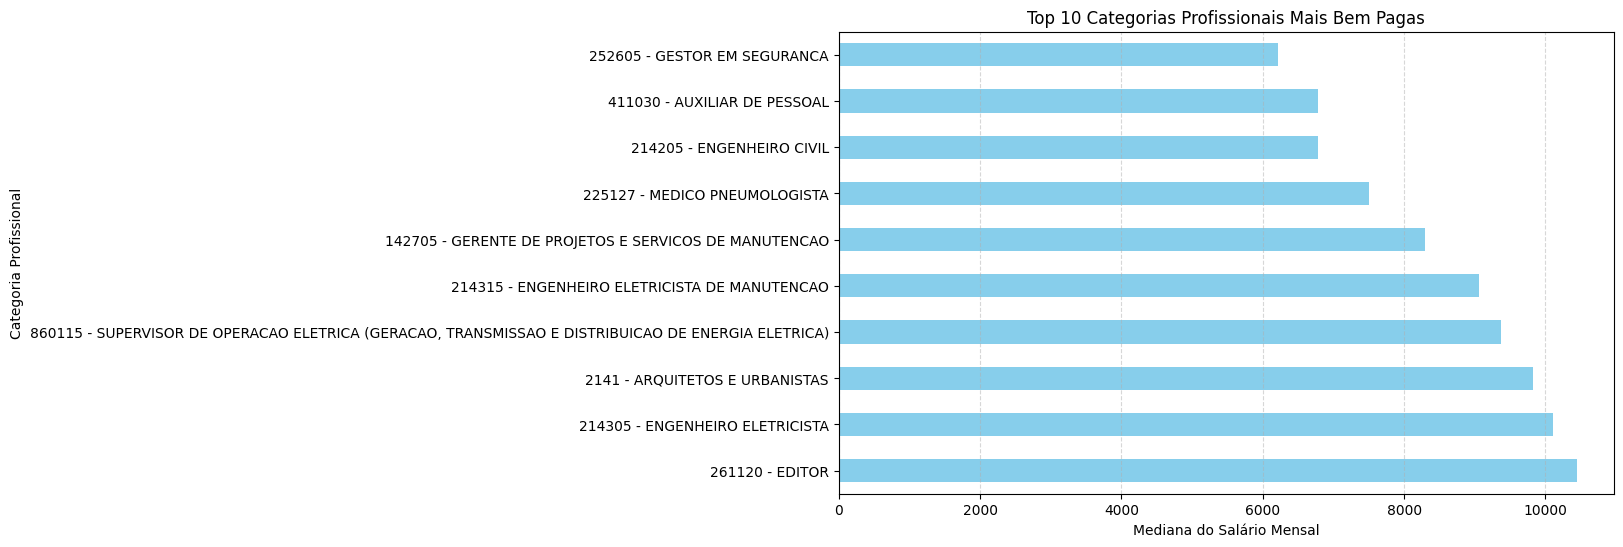

In [12]:
# Visualizar em gráfico de barras
plt.figure(figsize=(10, 6))
top_10_categorias.plot(kind='barh', color='skyblue')
plt.title('Top 10 Categorias Profissionais Mais Bem Pagas')
plt.xlabel('Mediana do Salário Mensal')
plt.ylabel('Categoria Profissional')
plt.grid(axis='x', linestyle='--', alpha=0.5)
plt.show()

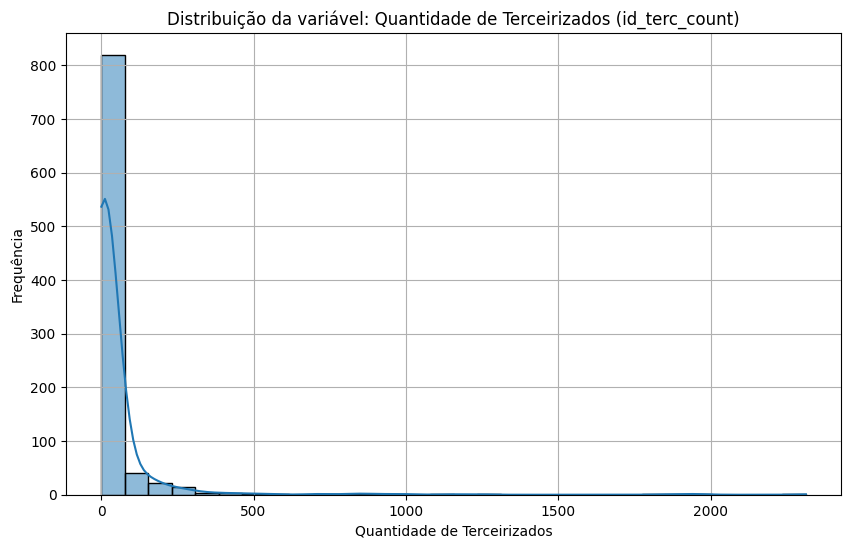

In [14]:
# Distribuição de quantidade dos terceirizados
plt.figure(figsize=(10, 6))
sns.histplot(df_categoria['id_terc_count'], bins=30, kde=True)
plt.title("Distribuição da variável: Quantidade de Terceirizados (id_terc_count)")
plt.xlabel("Quantidade de Terceirizados")
plt.ylabel("Frequência")
plt.grid(True)
plt.show()

É possível identificar que a variável é bastante assimétrica, concentrando a frequência em valores pequenos.

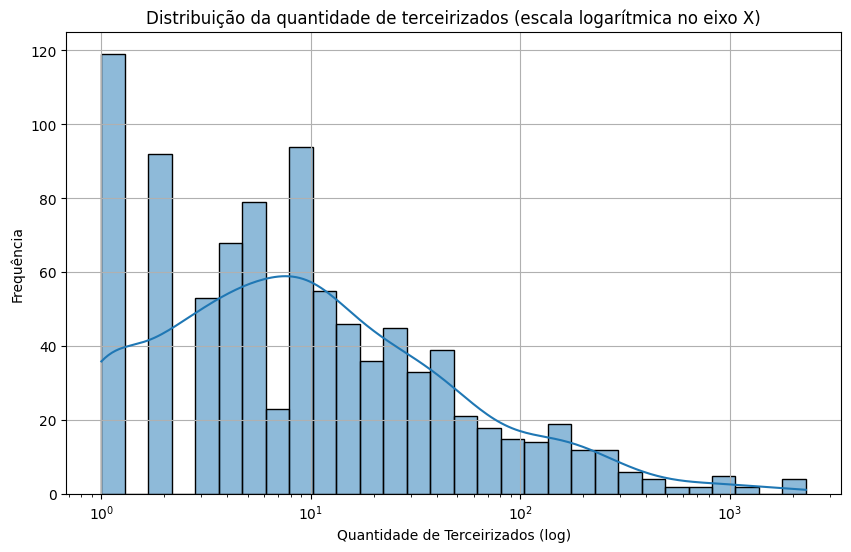

In [15]:
# Distribuição de quantidade dos terceirizados com escala logarítmica
plt.figure(figsize=(10, 6))
sns.histplot(df_categoria['id_terc_count'], bins=30, kde=True, log_scale=(True, False))
plt.title("Distribuição da quantidade de terceirizados (escala logarítmica no eixo X)")
plt.xlabel("Quantidade de Terceirizados (log)")
plt.ylabel("Frequência")
plt.grid(True)
plt.show()

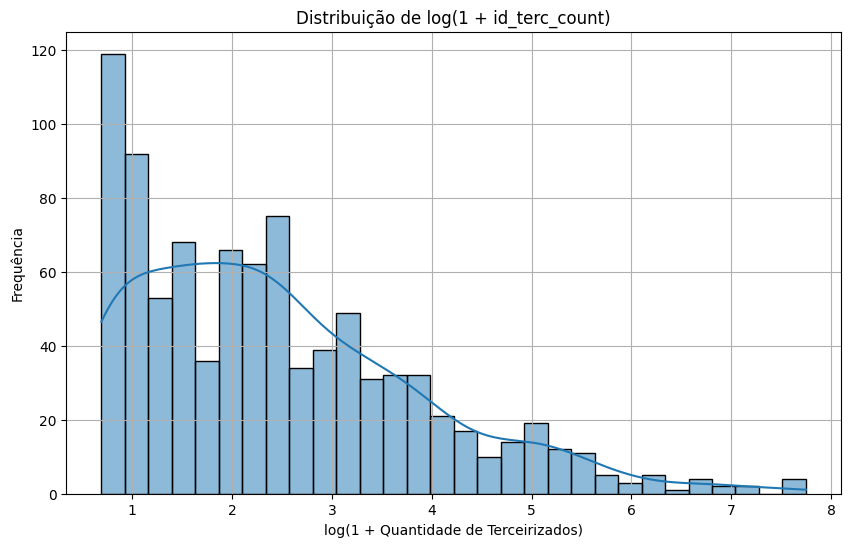

In [16]:
# Distribuição com transformação da variável com log1p (log(x+1)
plt.figure(figsize=(10, 6))
sns.histplot(np.log1p(df_categoria['id_terc_count']), bins=30, kde=True)
plt.title("Distribuição de log(1 + id_terc_count)")
plt.xlabel("log(1 + Quantidade de Terceirizados)")
plt.ylabel("Frequência")
plt.grid(True)
plt.show()

## Preparar os dados para o protótipo

In [17]:
# Capturar a importância relativas das palavras na coluna de objeto_contrato
tfidf = TfidfVectorizer(max_features=100)  # Limitar para reduzir dimensionalidade
tfidf_features = tfidf.fit_transform(df_categoria['objeto_contrato']).toarray()

# Converter para dataframe
tfidf_df = pd.DataFrame(tfidf_features, columns=tfidf.get_feature_names_out())
df_modelo = pd.concat([df_categoria, tfidf_df], axis=1)

In [18]:
df_modelo.columns.tolist()

['nm_categoria_profissional',
 'vl_mensal_salario_mean',
 'vl_mensal_salario_median',
 'vl_mensal_custo_mean',
 'vl_mensal_custo_median',
 'nr_jornada_mean',
 'nr_jornada_median',
 'id_terc_count',
 'sg_orgao_sup_tabela_ug_x',
 'cd_ug_gestora_x',
 'nm_ug_tabela_ug_x',
 'sg_ug_gestora_x',
 'nm_razao_social',
 'nm_unidade_prestacao_x',
 'sg_orgao_x',
 'nm_orgao_x',
 'cd_orgao_siafi',
 'cd_orgao_siape_x',
 'cnpj_formatado_x',
 'objeto_contrato',
 'objeto_compra',
 'dataAssinatura',
 'dataPublicacaoDOU',
 'dataInicioVigencia',
 'dataFimVigencia',
 'tipo_fornecedor',
 'valorInicialCompra',
 'valorFinalCompra',
 '12',
 'administrativo',
 'alegre',
 'alfenas',
 'anexo',
 'aositens',
 'apoio',
 'associados',
 'atividades',
 'campus',
 'civil',
 'com',
 'conforme',
 'conservação',
 'considerando',
 'construção',
 'continuados',
 'contratação',
 'contrato',
 'controle',
 'contínua',
 'copeiragem',
 'corretiva',
 'da',
 'de',
 'dependências',
 'deste',
 'diversos',
 'do',
 'dos',
 'edital',
 'elé

In [19]:
# Baixar as stopwords em português
nltk.download('stopwords')
stopwords_portugues = stopwords.words('portuguese')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/rislamiranda/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [20]:
# Adicionar palavras inerentes aos contratos à lista de stopwords
stopwords_portugues.extend(["objeto", "serviços", "prestação", "empresa", "serviço", "especializada", "contratação", "edital", "fornecimento"])

# Configurar o TF-IDF com stopwords personalizadas
vectorizer = TfidfVectorizer(max_features=50, stop_words=stopwords_portugues, ngram_range=(1, 2))

# Aplicar TF-IDF na coluna 'objeto_contrato'
tfidf_matrix = vectorizer.fit_transform(df_categoria['objeto_contrato'].fillna(""))

# Converter para DataFrame para fácil visualização
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=vectorizer.get_feature_names_out())

# Identificar os termos mais importantes (maior soma de TF-IDF)
termos_importantes = tfidf_df.sum().sort_values(ascending=False)

print("🔍 Termos mais importantes (sem 'objeto'):\n")
print(termos_importantes.head(20))

🔍 Termos mais importantes (sem 'objeto'):

campus           129.913861
manutenção        83.682392
predial           64.809029
recepcionista     61.098805
materiais         59.423711
limpeza           59.124408
conservação       57.630474
mg                52.784519
continuados       50.380963
atividades        49.886885
obra              48.453580
conforme          47.629905
apoio             44.455472
dependências      44.210989
mão               42.342256
mão obra          42.342256
pregao            40.954331
termo             38.227751
contínua          38.072969
deste             34.775794
dtype: float64


In [21]:
# One-Hot Encoding para variáveis categóricas relevantes
df_dummies = pd.get_dummies(df_categoria[['nm_categoria_profissional', 'tipo_fornecedor']], drop_first=True)

# Concatenar TF-IDF + Dummies ao DataFrame original
df_modelo = pd.concat([df_categoria, tfidf_df, df_dummies], axis=1)

In [22]:
X = df_modelo.select_dtypes(include=['number']).drop(columns=['id_terc_count'])
y = df_modelo['id_terc_count']

## Modelo de regressão linear

In [23]:
# Separar treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Treinar o modelo
modelo = LinearRegression()
modelo.fit(X_train, y_train)

# Avaliação
y_pred = modelo.predict(X_test)
print("🔍 R² Score:", r2_score(y_test, y_pred))
print("📉 RMSE:", mean_squared_error(y_test, y_pred, squared=False))

🔍 R² Score: 0.014256186987287034
📉 RMSE: 202.35318431042057


/Users/rislamiranda/Library/Python/3.9/lib/python/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


#### Treino de modelo com escala logarítmica

In [24]:
# Selecionar apenas variáveis numéricas, excluindo o target
X = df_modelo.select_dtypes(include='number').drop(columns=['id_terc_count'])

# Transformar o target com log(1 + x)
y_log = np.log1p(df_modelo['id_terc_count'])

# Dividir em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y_log, test_size=0.2, random_state=42)

# Treinar modelo
modelo_log = LinearRegression()
modelo_log.fit(X_train, y_train)

# Prever e reverter log
y_pred_log = modelo_log.predict(X_test)
y_pred = np.expm1(y_pred_log)  # inverso de log1p

# Reverter o y_test também
y_test_real = np.expm1(y_test)

# Avaliação
r2 = r2_score(y_test_real, y_pred)
rmse = np.sqrt(mean_squared_error(y_test_real, y_pred))

print(f"🔍 R² Score: {r2:.4f}")
print(f"📉 RMSE: {rmse:.2f}")

🔍 R² Score: -0.1521
📉 RMSE: 218.76


## Modelo com Random Forest

In [25]:
# Separar treino e teste
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Criar e treinar o modelo
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Previsões
y_pred = rf_model.predict(X_test)

# Avaliação
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(f"🌲 R² Score (Random Forest): {r2:.4f}")
print(f"📉 RMSE: {rmse:.2f}")

🌲 R² Score (Random Forest): -0.1640
📉 RMSE: 219.89
